In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from cmath import sinh, tanh, cosh

%matplotlib inline

/home/ninja/anaconda3/envs/DS1_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ninja/anaconda3/envs/DS1_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ninja/anaconda3/envs/DS1_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ninja/anaconda3/envs/DS1_env/lib/python3

In [2]:
SAMPLE_SIZE = 600
NETA_RANGE = (0.7, 0.9)
DELTA_RANGE = (0.008, 0.1)
N_RANGE = (500, 5000)
PITCH_RANGE = (50, 300)
LAMBDA_RANGE = (300, 3000)
NO_OF_VARIABLES = 5

In [3]:
def P(neta, delta, N, pitch, x, x0):
    """
    Reflected power function
    """
    sqrt = lambda v: complex(v, 0)**0.5

    g = (1.0/(neta*delta))*((x/x0)-1)
    g = g**2

    theta = neta*delta*N*pitch*sqrt(1-g)/x

    nr = sinh(theta)**2
    dr = (cosh(theta)**2)-g

    return abs(nr/dr)


def reflected_samples(neta:float, delta:float, N:float, pitch:float, x0:float):
    """
    returns : numpy array 
    """
    
    # uniformly sample the function
    # generate sample points
    d = (LAMBDA_RANGE[1] - LAMBDA_RANGE[0])/SAMPLE_SIZE
    x = LAMBDA_RANGE[0]
    
    Y = []
    
    neta = NETA_RANGE[0]+(NETA_RANGE[1]-NETA_RANGE[0])*neta
    delta = DELTA_RANGE[0]+(DELTA_RANGE[1]-DELTA_RANGE[0])*delta
    N = N_RANGE[0]+(N_RANGE[1]-N_RANGE[0])*N
    pitch = PITCH_RANGE[0]+(PITCH_RANGE[1]-PITCH_RANGE[0])*pitch
    x0 = LAMBDA_RANGE[0]+(LAMBDA_RANGE[1]-LAMBDA_RANGE[0])*x0

    for _ in range(SAMPLE_SIZE):
        Y.append(P(neta, delta, N, pitch, x, x0))
        x = x + d
    
    return np.array(Y)

In [10]:
bwd = keras.models.load_model('bwd_64x64x64x32x5_adam_50epochs_51%_300000samples')
bwd.trainable = False

In [11]:
bwd.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bwd_input_layer (InputLayer) [(None, 60)]              0         
_________________________________________________________________
bwd_hidden_layer1 (Dense)    (None, 64)                3904      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
bwd_hidden_layer2 (Dense)    (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
bwd_hidden_layer3 (Dense)    (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256   

In [5]:
with np.load('data_60_samples300000.npz') as data:
    _, x_test, _, y_test = train_test_split(data['X'], data['Y'], test_size=0.1, shuffle=True)

In [46]:
x_pred = bwd.predict(y_test)

In [47]:
print(f'shape of predictions: {x_pred.shape}')
print(f'shape of x_test: {x_test.shape}')
print(f'shape of y_test: {y_test.shape}')


shape of predictions: (30000, 5)
shape of x_test: (30000, 5)
shape of y_test: (30000, 60)


In [48]:
actual = [reflected_samples(x[0], x[1], x[2], x[3], x[4]) for x in x_test]
predicted = [reflected_samples(x[0], x[1], x[2], x[3], x[4]) for x in x_pred]

/home/ninja/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


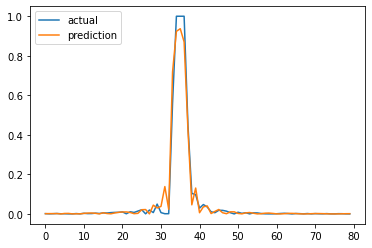

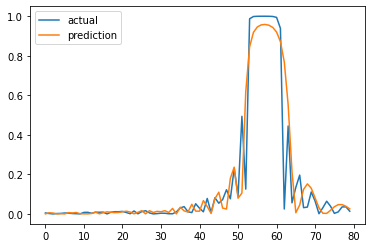

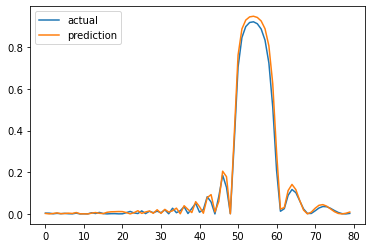

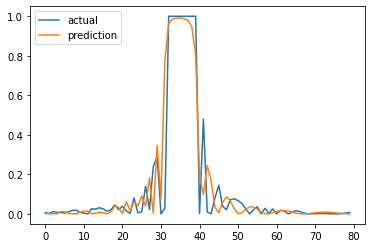

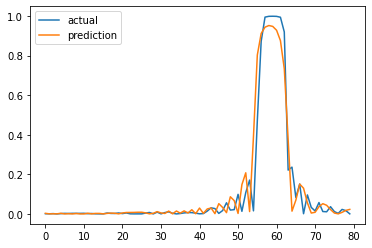

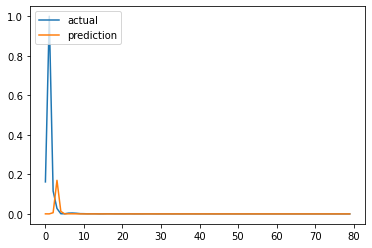

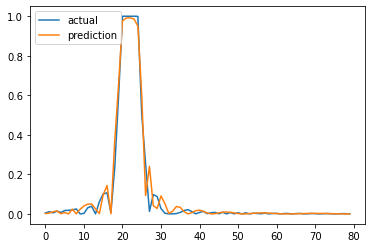

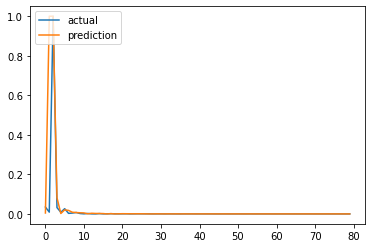

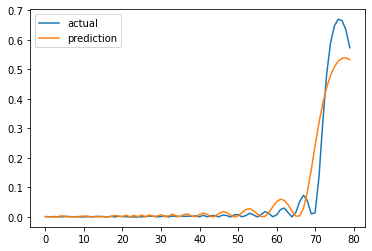

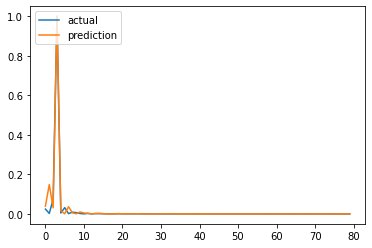

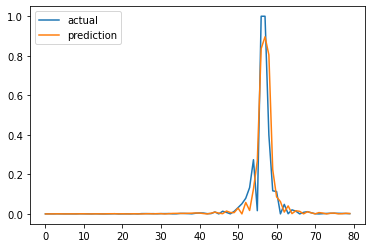

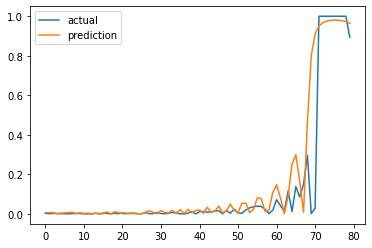

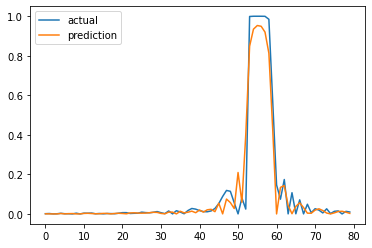

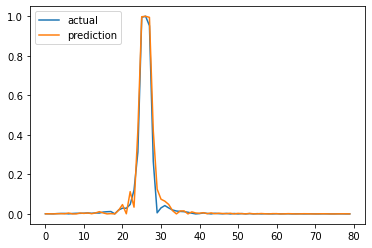

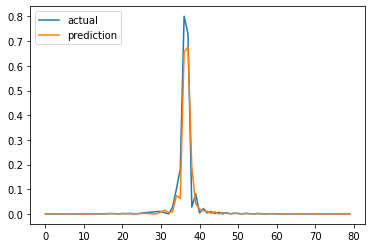

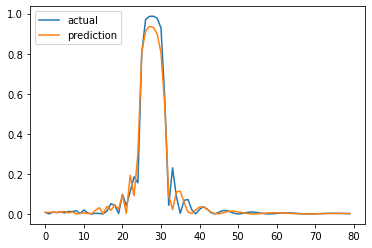

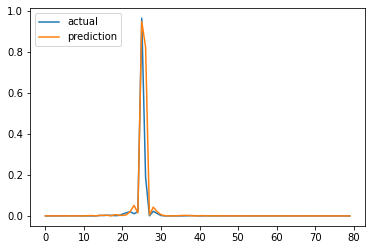

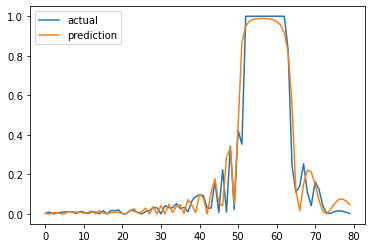

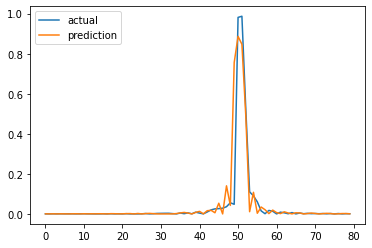

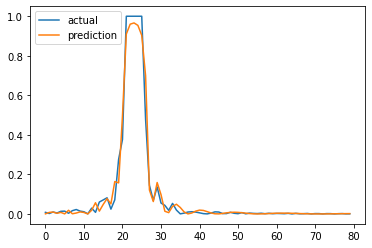

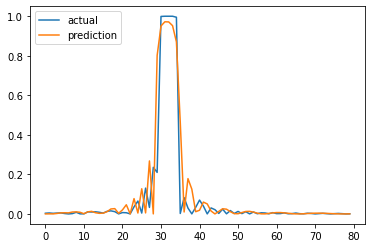

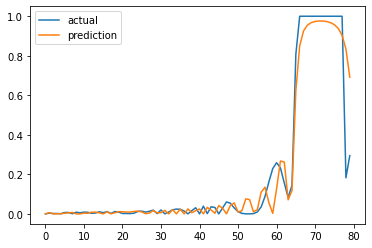

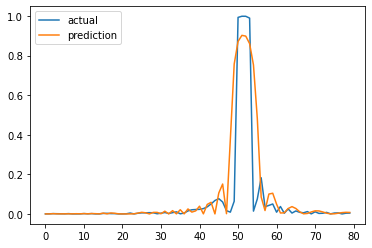

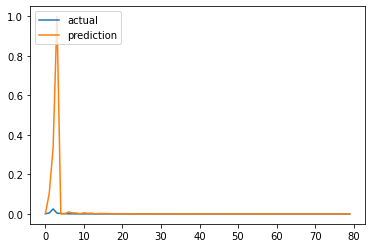

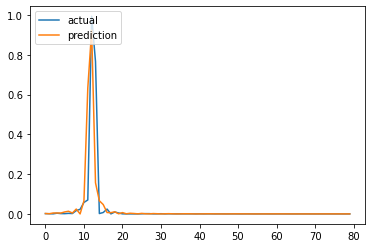

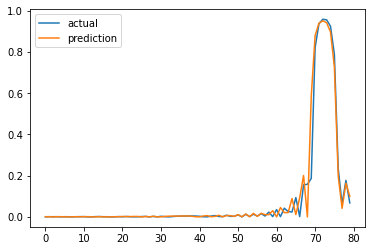

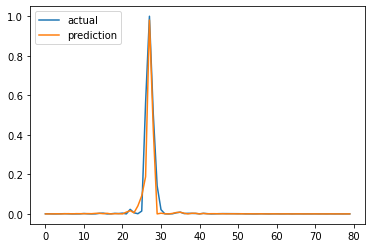

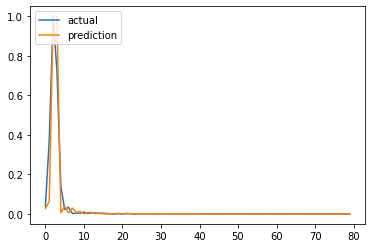

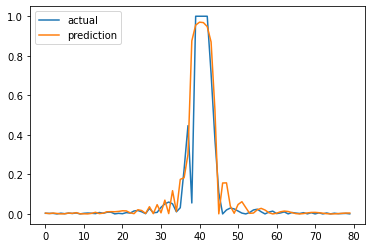

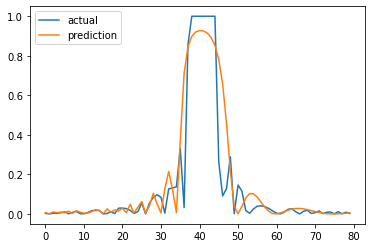

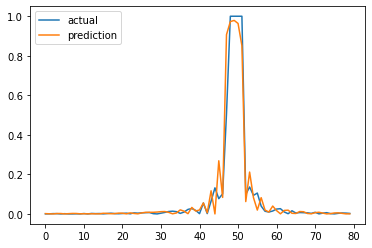

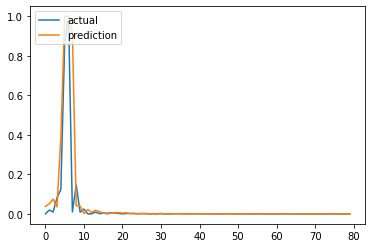

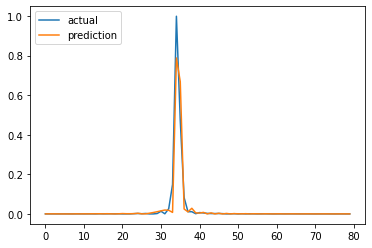

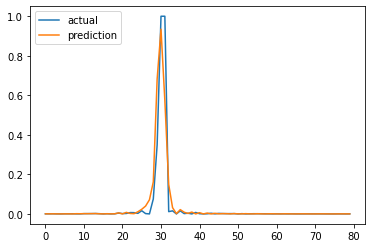

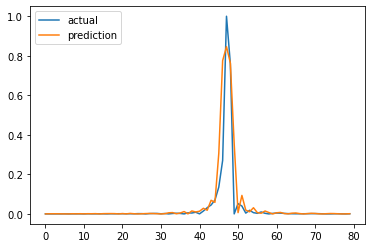

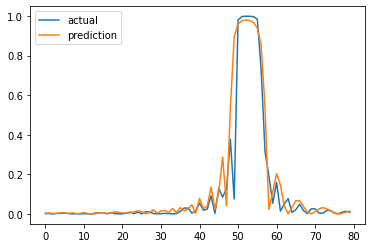

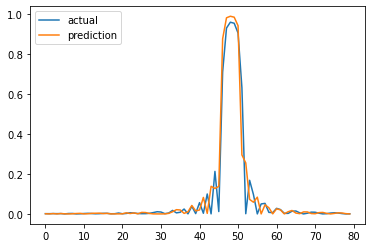

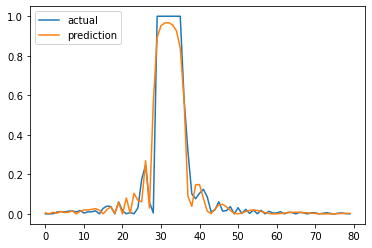

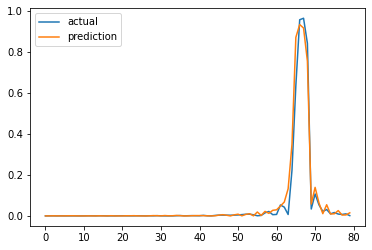

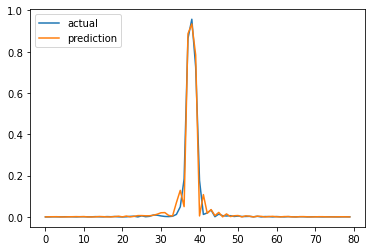

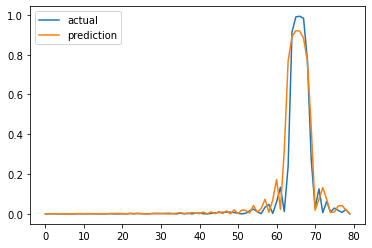

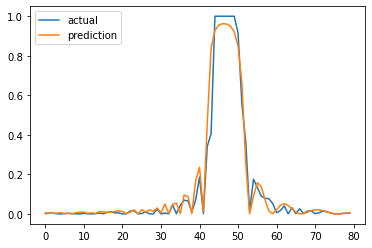

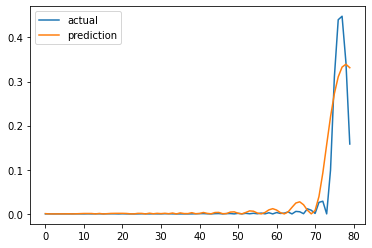

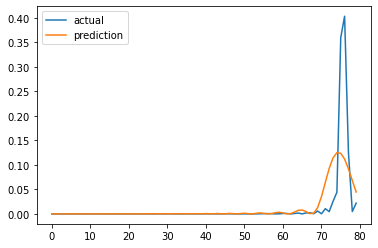

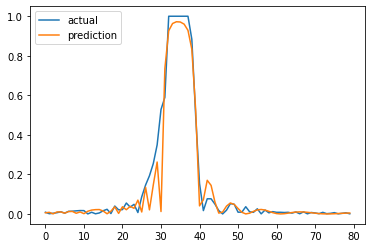

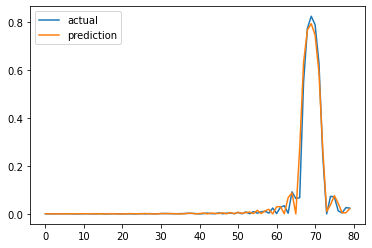

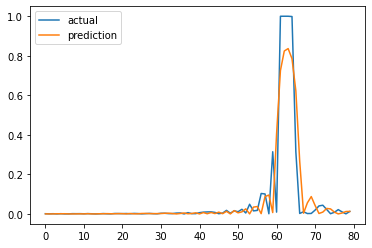

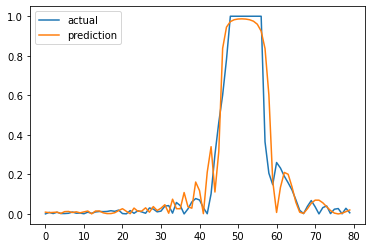

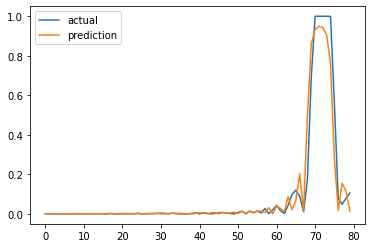

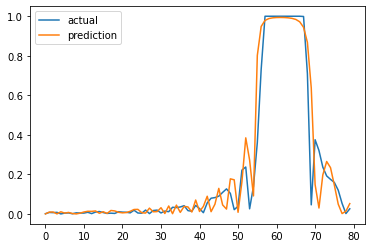

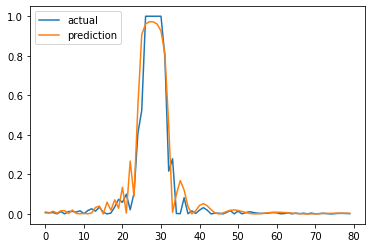

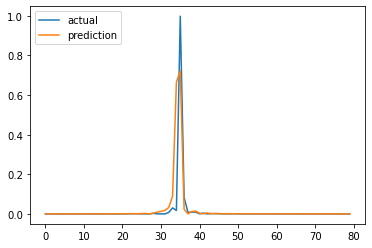

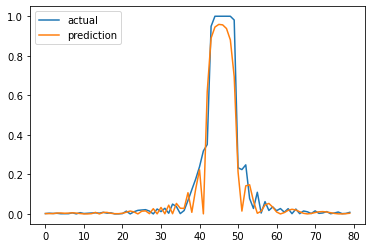

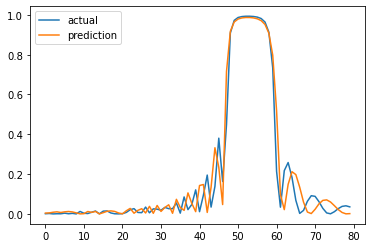

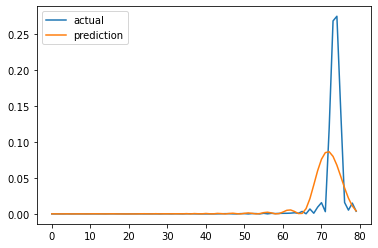

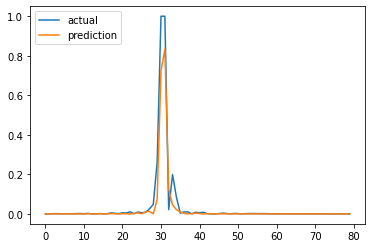

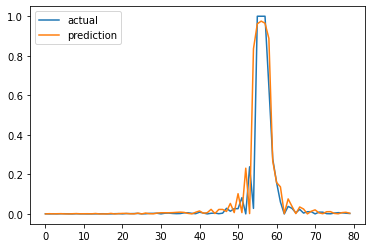

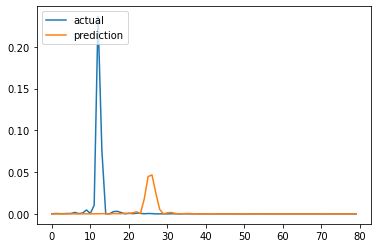

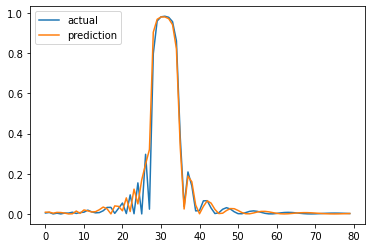

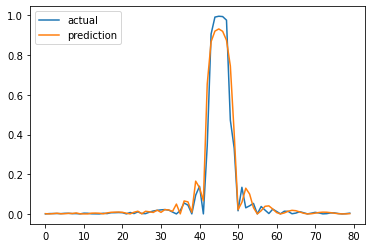

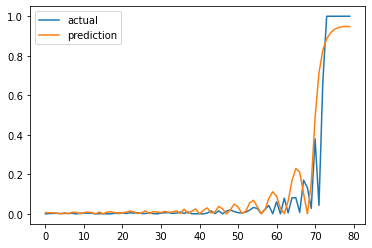

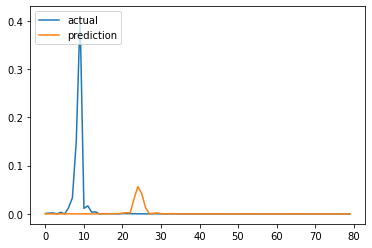

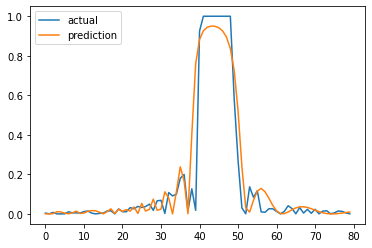

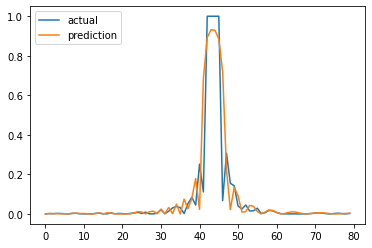

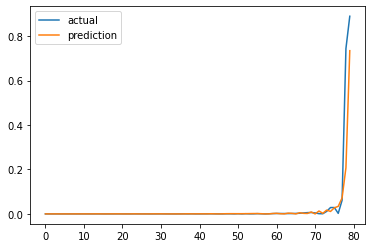

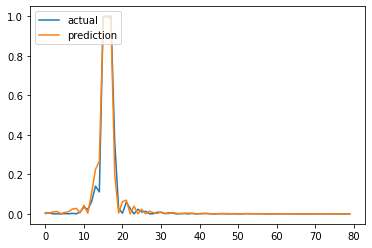

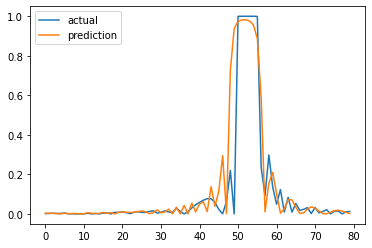

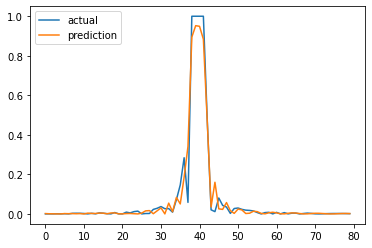

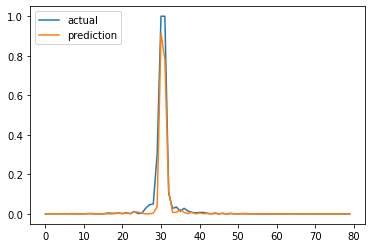

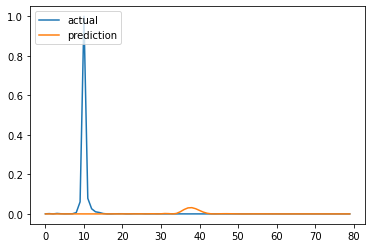

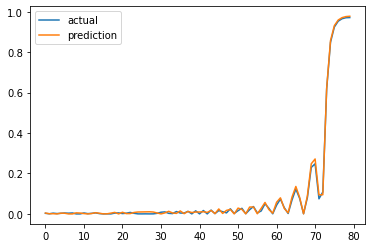

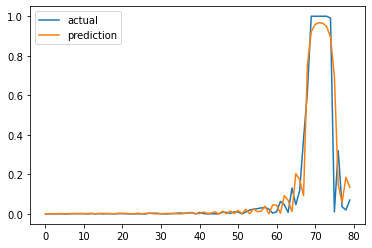

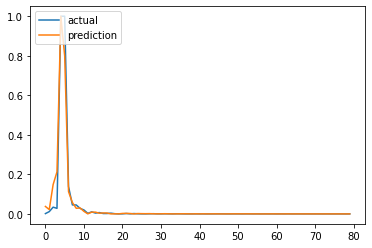

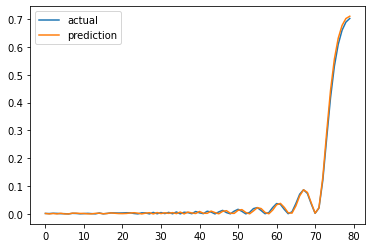

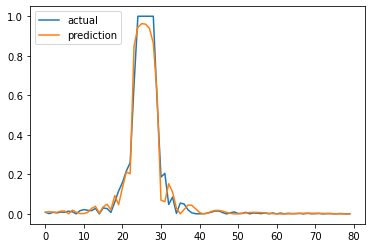

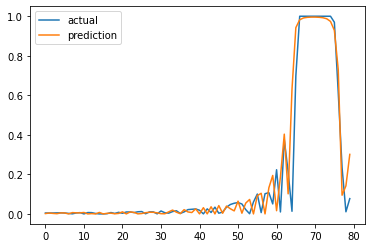

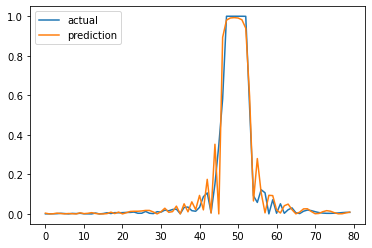

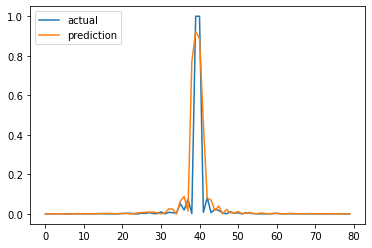

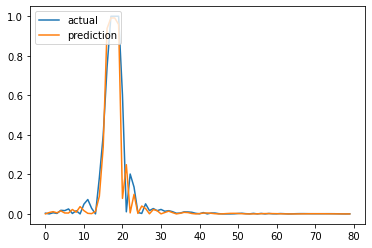

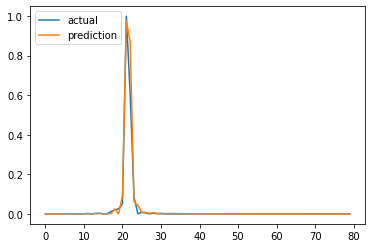

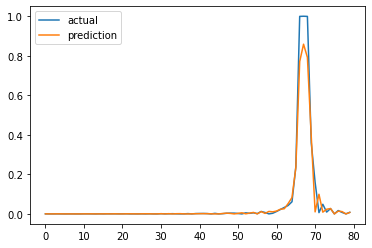

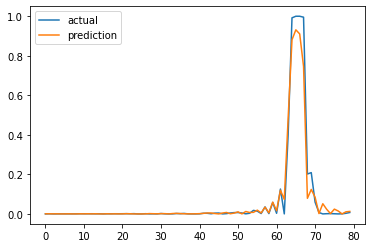

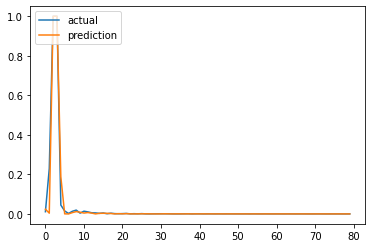

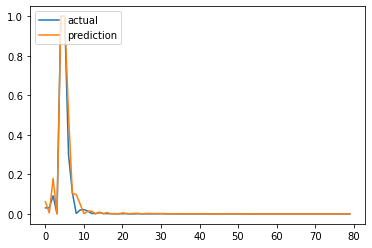

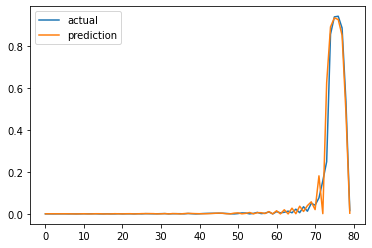

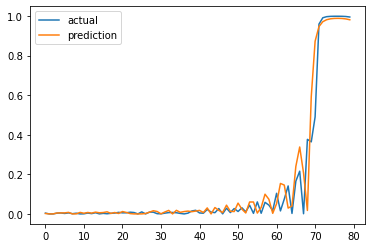

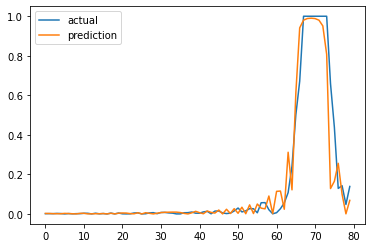

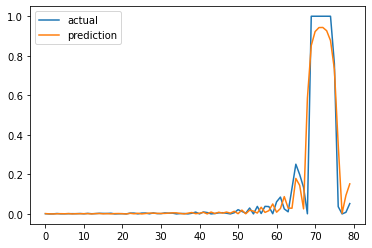

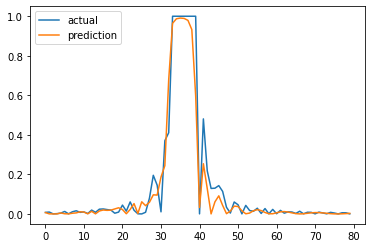

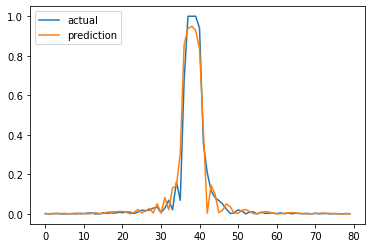

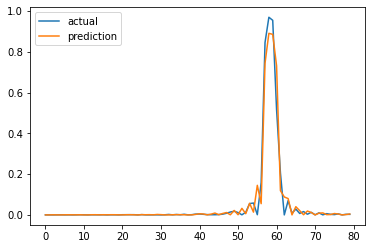

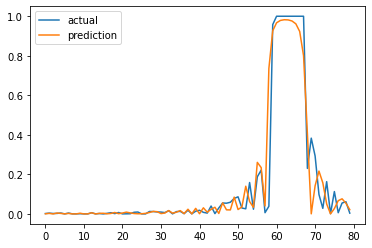

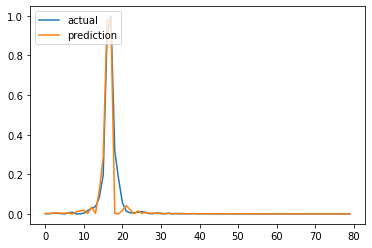

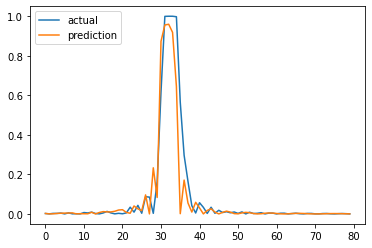

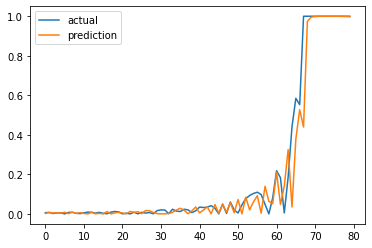

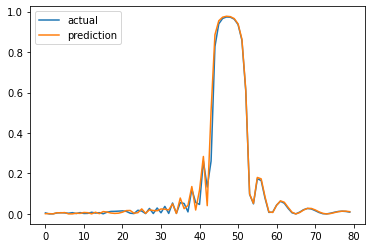

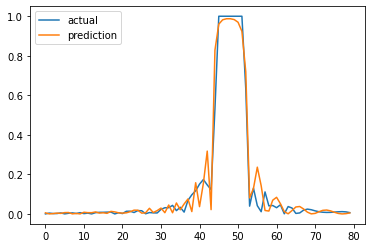

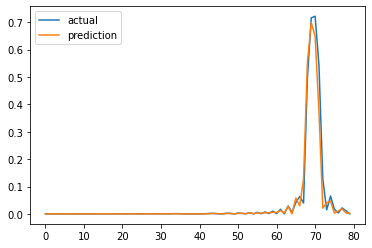

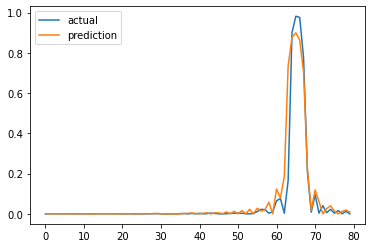

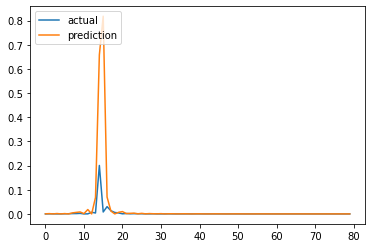

In [49]:
for i in range(100):
    fig, ax = plt.subplots()
    ax.plot(actual[i])
    ax.plot(predicted[i])

    ax.legend(['actual', 'prediction'], loc='upper left')

In [4]:
# test for fwd model
fwd = keras.models.load_model('fwd_64x64x64x64x60_50epochs300000samples_56%_adam')

In [6]:
# fwd model takes design paramets and outputs function samples
predictions = fwd.predict(x_test)

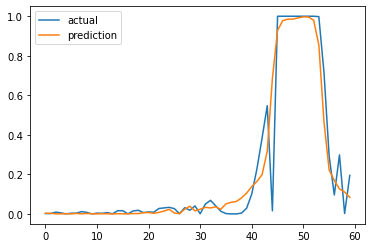

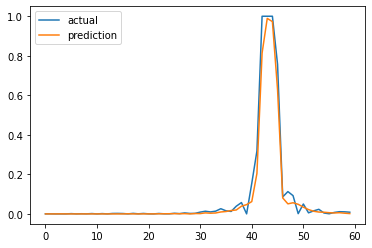

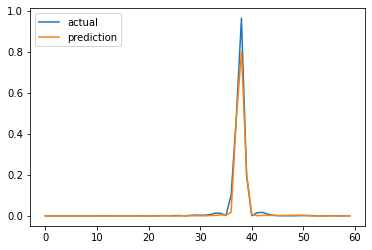

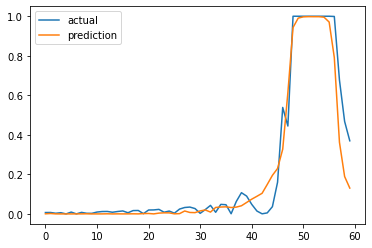

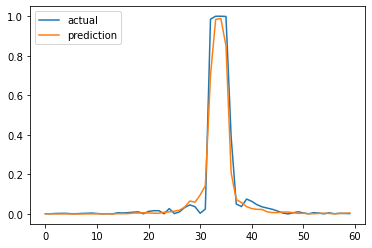

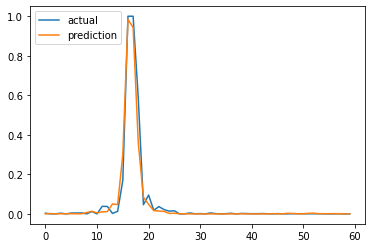

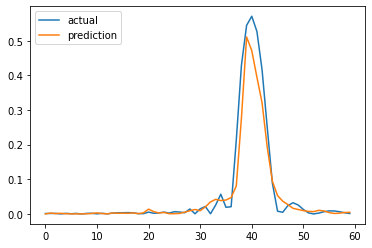

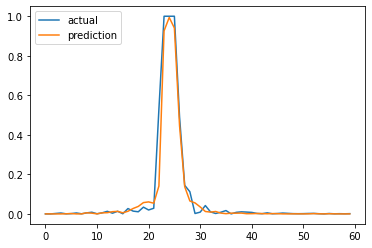

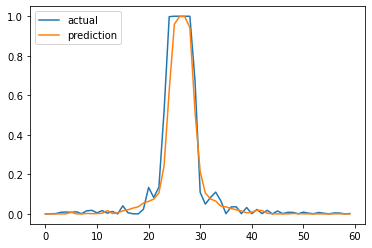

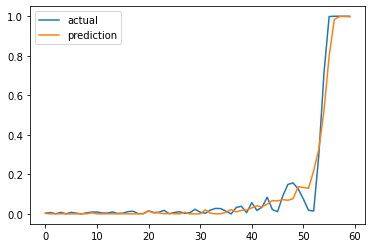

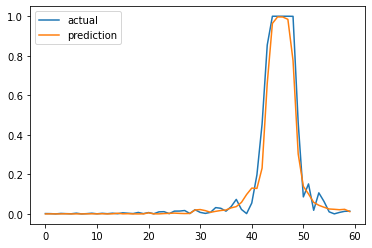

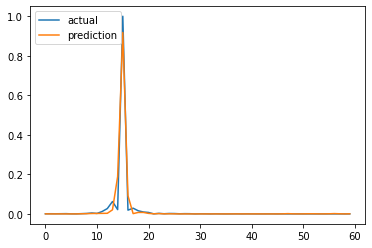

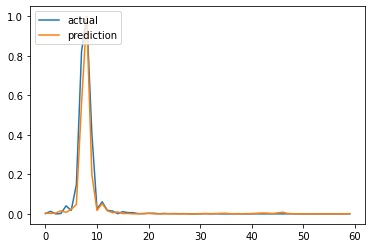

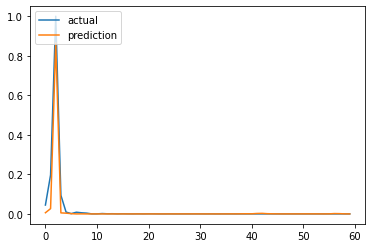

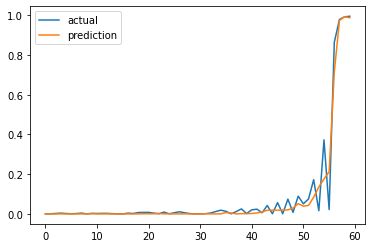

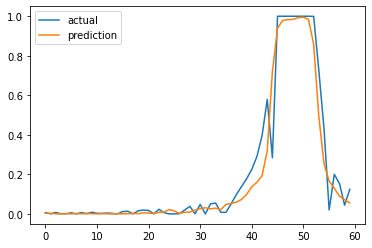

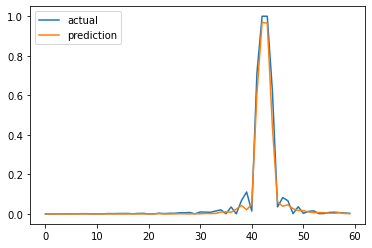

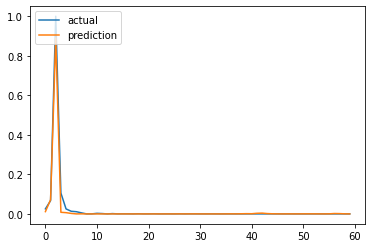

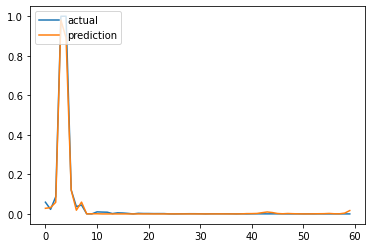

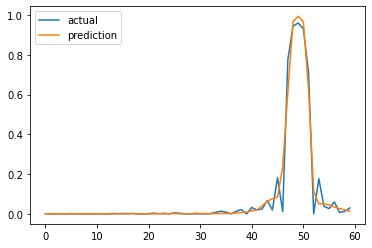

In [8]:
for i in range(5, 25):
    fig, ax = plt.subplots()
    ax.plot(y_test[i])
    ax.plot(predictions[i])

    ax.legend(['actual', 'prediction'], loc='upper left')